<a href="https://colab.research.google.com/github/Clay-the-Great/day-100-multivariable-regression-salary-prediction/blob/main/Determinants_of_Earnings_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 44.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/day-100-multivariable-regression-salary-prediction/NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(2000, 96)

In [ ]:
df_data.sample()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
804,4046,8.39,15,3.50,1,0,1981,30,20.00,"29,000.00",...,1,0,0,1,0,0,0,1,0,0


In [ ]:
# list(df_data.columns)
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [ ]:
df_data.isna().values.any()

True

In [ ]:
df_data.duplicated().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [ ]:
df_data.drop_duplicates(inplace=True)

In [ ]:
df_data.shape

(1487, 96)

## Descriptive Statistics

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1995
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1487 non-null   int64  
 1   EARNINGS  1487 non-null   float64
 2   S         1487 non-null   int64  
 3   EXP       1487 non-null   float64
 4   FEMALE    1487 non-null   int64  
 5   MALE      1487 non-null   int64  
 6   BYEAR     1487 non-null   int64  
 7   AGE       1487 non-null   int64  
 8   AGEMBTH   1453 non-null   float64
 9   HHINC97   1205 non-null   float64
 10  POVRAT97  1203 non-null   float64
 11  HHBMBF    1487 non-null   int64  
 12  HHBMOF    1487 non-null   int64  
 13  HHOMBF    1487 non-null   int64  
 14  HHBMONLY  1487 non-null   int64  
 15  HHBFONLY  1487 non-null   int64  
 16  HHOTHER   1487 non-null   int64  
 17  MSA97NO   1487 non-null   int64  
 18  MSA97NCC  1487 non-null   int64  
 19  MSA97CC   1487 non-null   int64  
 20  MSA97NK   1487 non-null   int6

In [ ]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualise the Features

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_data.loc[:, df_data.columns != "EARNINGS"], df_data["EARNINGS"], train_size=0.8, test_size=0.2, random_state=10)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [ ]:
regression = LinearRegression()

In [ ]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [ ]:
schooling = pd.DataFrame(X_train["S"])

In [ ]:
regression.fit(schooling, y_train)

LinearRegression()

In [ ]:
regression.intercept_

array([1.02890741])

In [ ]:
regression.coef_

array([[1.21917798]])

In [ ]:
# R-squared
regression.score(schooling, y_train)

0.08085050566060015

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [ ]:
print(f"For one extra year of schooling, you can expect to earn {round(regression.coef_[0][0], 2)} more dollars.")

For one extra year of schooling, you can expect to earn 1.22 more dollars.


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [ ]:
predicted_values = regression.predict(schooling)
residuals = y_train - predicted_values
df_compare = pd.DataFrame()
df_compare["true_values"] = y_train
df_compare["predicted"] = predicted_values
df_compare["residuals"] = residuals

In [ ]:
scatter = px.scatter(df_compare, x=df_compare.true_values, y=df_compare.predicted)
scatter.update_layout(
    title="Predicted vs true earnings",
    yaxis_title="Predicted value",
    xaxis_title="True value"
)

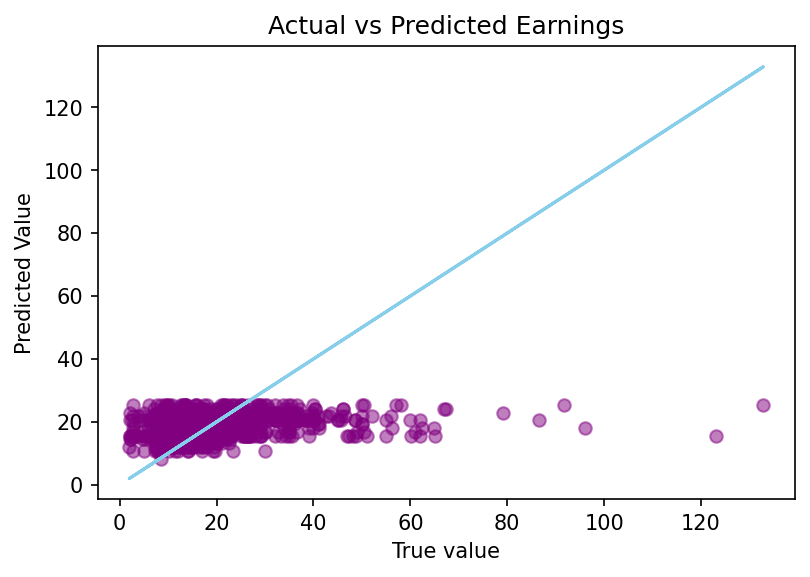

In [ ]:
plt.figure(figsize=(6, 4), dpi=150)
axes = plt.axes()
axes.scatter(x=df_compare.true_values, y=df_compare.predicted, alpha=0.5, color="purple")
plt.plot(df_compare.true_values, df_compare.true_values, color="skyblue")
plt.title("Actual vs Predicted Earnings")
plt.xlabel("True value")
plt.ylabel("Predicted Value")
plt.show()

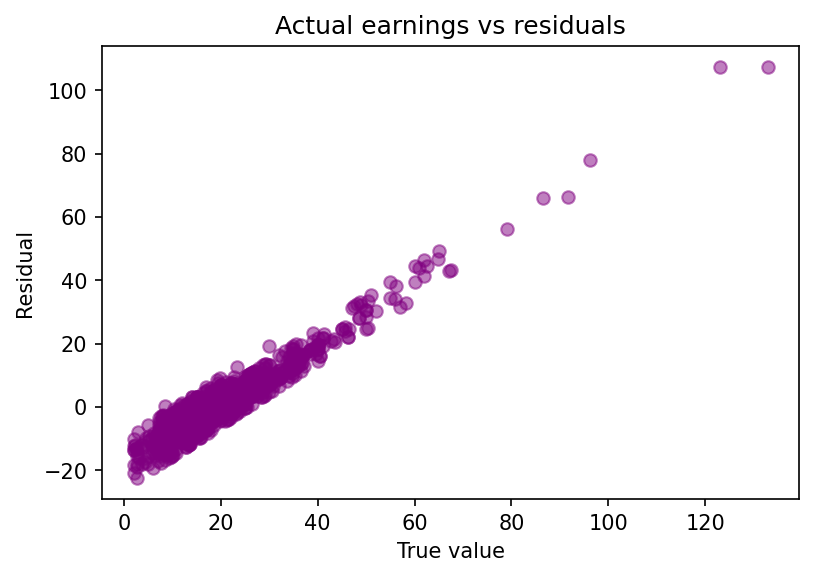

In [ ]:
plt.figure(figsize=(6, 4), dpi=150)
axes = plt.axes()
axes.scatter(x=df_compare.true_values, y=df_compare.residuals, alpha=0.5, color="purple")
plt.title("Actual earnings vs residuals")
plt.xlabel("True value")
plt.ylabel("Residual")
plt.show()

In [ ]:
df_compare["residuals"].shape

(1189,)

In [ ]:
df_compare["residuals"].mean()

1.6613194326434639e-15

In [ ]:
df_compare["residuals"].skew()

2.9961668710020586

<Figure size 1500x1200 with 0 Axes>

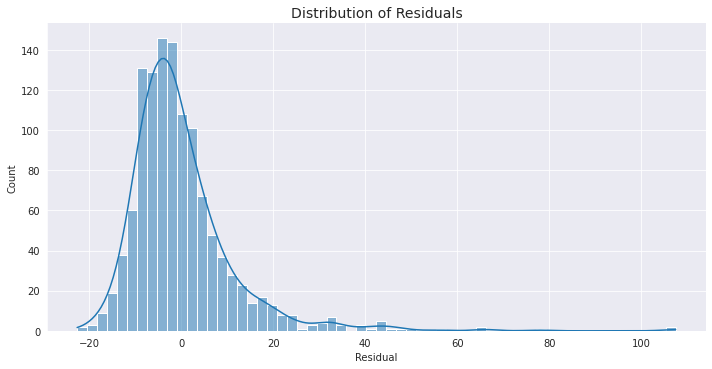

In [ ]:
# plot a histogram of the residuals superimposed with KDE
plt.figure(figsize=(5, 4), dpi=300)
with sns.axes_style("darkgrid"):
  sns.displot(df_compare, x="residuals", kde=True, aspect=2, bins=60)
plt.title("Distribution of Residuals", fontsize=14)
plt.xlabel("Residual")
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [ ]:
schooling_work = pd.DataFrame(X_train[["S", "EXP"]])

In [ ]:
schooling_work.dtypes

S        int64
EXP    float64
dtype: object

In [ ]:
multivariable_regression = LinearRegression()

In [ ]:
multivariable_regression.fit(schooling_work, y_train)

LinearRegression()

In [ ]:
print(f"The r-squared of this multivariable regression is {multivariable_regression.score(schooling_work, y_train): .3}.")

The r-squared of this multivariable regression is  0.117.


### Evaluate the Coefficients of the Model

In [ ]:
multivariable_regression.coef_

array([[1.79422175, 0.97900689]])

In [ ]:
multivariable_coefficients = pd.DataFrame()
multivariable_coefficients["name"] = schooling_work.columns
multivariable_coefficients["value"] = multivariable_regression.coef_[0]
multivariable_coefficients

,name,value
0,S,1.79
1,EXP,0.98


### Analyse the Estimated Values & Regression Residuals

In [ ]:
predicted_values_multi = multivariable_regression.predict(schooling_work)
residuals_multi = y_train - predicted_values_multi
df_comparison_multi = pd.DataFrame()
df_comparison_multi["true_values"] = y_train
df_comparison_multi["predicted"] = predicted_values_multi
df_comparison_multi["residuals"] = residuals_multi

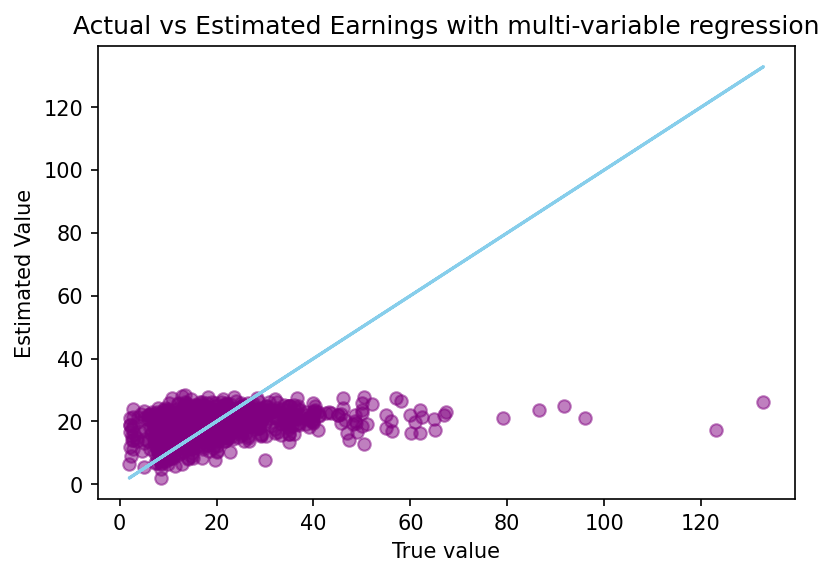

In [ ]:
plt.figure(figsize=(6, 4), dpi=150)
axes = plt.axes()
axes.scatter(x=df_comparison_multi.true_values, y=df_comparison_multi.predicted, alpha=0.5, color="purple")
plt.plot(df_comparison_multi.true_values, df_comparison_multi.true_values, color="skyblue")
plt.title("Actual vs Estimated Earnings with multi-variable regression")
plt.xlabel("True value")
plt.ylabel("Estimated Value")
plt.show()

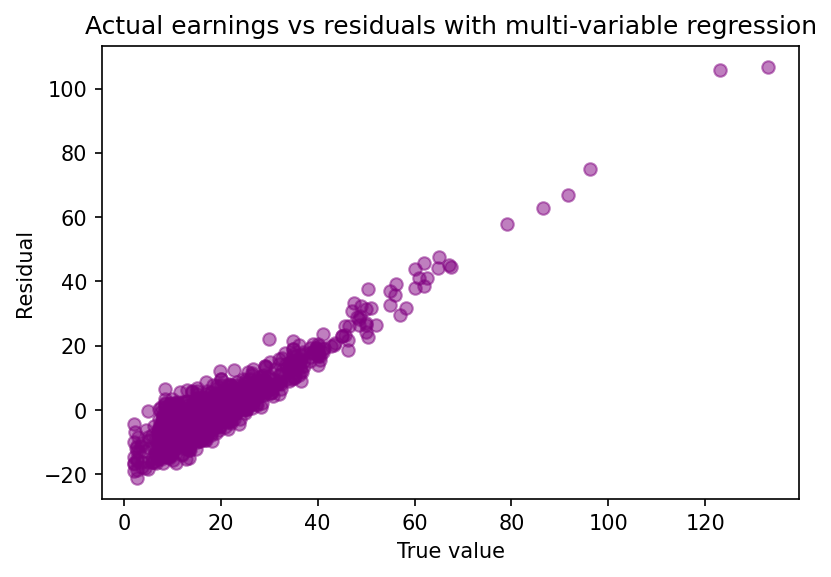

In [ ]:
plt.figure(figsize=(6, 4), dpi=150)
axes = plt.axes()
axes.scatter(x=df_comparison_multi.true_values, y=df_comparison_multi.residuals, alpha=0.5, color="purple")
plt.title("Actual earnings vs residuals with multi-variable regression")
plt.xlabel("True value")
plt.ylabel("Residual")
plt.show()

In [ ]:
df_comparison_multi["residuals"].mean()

4.230986180976879e-15

In [ ]:
df_comparison_multi["residuals"].skew()

3.019551013750878

<Figure size 1500x1200 with 0 Axes>

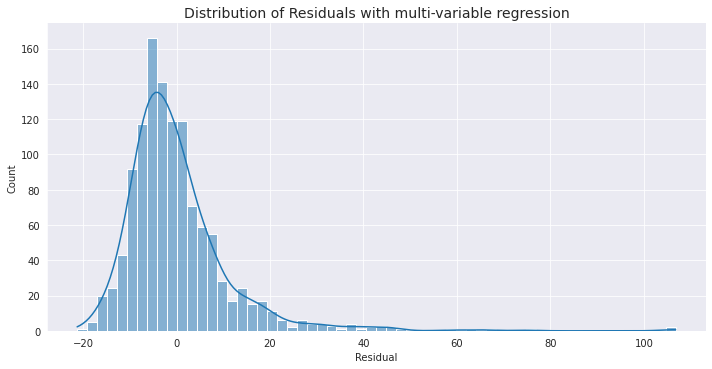

In [ ]:
# plot a histogram of the residuals superimposed with KDE
plt.figure(figsize=(5, 4), dpi=300)
with sns.axes_style("darkgrid"):
  sns.displot(df_comparison_multi, x="residuals", kde=True, aspect=2, bins=60)
plt.title("Distribution of Residuals with multi-variable regression", fontsize=14)
plt.xlabel("Residual")
plt.show()

Compare out-of-sample performance

In [ ]:
schooling_work_test = pd.DataFrame(X_test[["S", "EXP"]])

In [ ]:
print(f"R-squared of the model on test data: {multivariable_regression.score(schooling_work_test, y_test): .2}")
print(f"R-squared of the model on training data: {multivariable_regression.score(schooling_work, y_train): .2}")

R-squared of the model on test data:  0.087
R-squared of the model on training data:  0.12


# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [ ]:
features = pd.DataFrame(data=[[16, 5]], columns=["S", "EXP"])
features

,S,EXP
0,16,5


In [ ]:
predicted_earning = multivariable_regression.predict(features)[0][0]
print(f"The predicted earning of such a person is ${predicted_earning:.4}.")

The predicted earning of such a person is $19.71.


In [ ]:
type(predicted_earning)

numpy.float64

In [ ]:
sample = df_data.sample()
sample.EARNINGS

1286   12.50
Name: EARNINGS, dtype: float64

In [ ]:
my_stats = pd.DataFrame(data=[[23, 3]], columns=["S", "EXP"])
my_stats

,S,EXP
0,23,3


In [ ]:
my_predicted_earning = multivariable_regression.predict(my_stats)[0][0]
print(f"My predicted earning is ${my_predicted_earning:.4}.")

My predicted earning is $30.32.


In [ ]:
multivariable_regression.coef_

array([[1.79422175, 0.97900689]])

# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [ ]:
df_data.sample()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
1067,638,27.40,16,5.42,0,1,1984,27,36.00,NaN,...,1,0,1,0,0,0,1,0,0,0


In [ ]:
df_further = df_data[["S", "EXP", "BYEAR", "JOBS", "EARNINGS"]].dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_further.loc[:, df_further.columns != "EARNINGS"], df_further["EARNINGS"], train_size=0.8, test_size=0.2, random_state=10)

In [ ]:
sophisticated_regression = LinearRegression()

In [ ]:
sophisticated_regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
sophisticated_regression.score(X_train, y_train)

0.1140171673195135

In [ ]:
my_features = pd.DataFrame(data=[[23, 3, 1988, 2]], columns=["S", "EXP", "BYEAR", "JOBS"])

In [ ]:
my_predicted_earning = sophisticated_regression.predict(my_features)[0]

In [ ]:
print(f"My new predicted hourly earning is ${my_predicted_earning:.4}.")

My new predicted hourly earning is $32.32.
